# Informações
* Nome : Bruno Venceslau Barbosa
* E-mail: bvb@cesar.school
* DataSet: https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset/data
* https://github.com/Bruno-Venceslau/dataset-modelos_preditivos/blob/main/Pistachio_16_Features_Dataset.xlsx?raw=1

# Importando as bibliotecas

In [39]:
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

import torch
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

# Leitura, normalização e visualização dos dados

In [40]:
url = "https://github.com/Bruno-Venceslau/dataset-modelos_preditivos/blob/main/Pistachio_16_Features_Dataset.xlsx?raw=1"
df = pd.read_excel(url)
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [41]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])
joblib.dump(le, "label_encoder.pkl")
print(le.classes_)

['Kirmizi_Pistachio' 'Siit_Pistachio']


In [42]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   int64  
dtypes: float64(14), int64(3)
memory usage: 285.4 KB


In [44]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239,0.426443
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840,0.494675
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,0.000000
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000,0.000000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100,0.000000
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300,1.000000
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000,1.000000


## Divisão Treino - Teste

In [45]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalização

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Transformando em Tensores

In [48]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

## Criando DataLoader

In [49]:
train_datase = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [50]:
train_loader = DataLoader(train_datase, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Construindo o modelo da rede

In [51]:
class Modelo(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Modelo, self).__init__()

        self.rede = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0,1),

            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.rede(x)

input_dim = X_train.shape[1]
output_dim = len(le.classes_)

model = Modelo(input_dim, output_dim)
print(model)


Modelo(
  (rede): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=1)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


# Treinamento

In [52]:
lr = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

## Laço de Treinamento

In [53]:
n_epochs = 400
losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    batches = 0

    for x_batch, y_batch in train_loader:
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        batches += 1

    epoch_loss = running_loss / batches
    losses.append(epoch_loss)

    print(f"Época {epoch+1}/{n_epochs}, Loss treino: {epoch_loss:.4f}")

print('Final loss treino:', epoch_loss)

Época 1/400, Loss treino: 0.5837
Época 2/400, Loss treino: 0.3752
Época 3/400, Loss treino: 0.3228
Época 4/400, Loss treino: 0.3164
Época 5/400, Loss treino: 0.3119
Época 6/400, Loss treino: 0.3095
Época 7/400, Loss treino: 0.3049
Época 8/400, Loss treino: 0.3060
Época 9/400, Loss treino: 0.3049
Época 10/400, Loss treino: 0.3046
Época 11/400, Loss treino: 0.2998
Época 12/400, Loss treino: 0.2983
Época 13/400, Loss treino: 0.3011
Época 14/400, Loss treino: 0.3013
Época 15/400, Loss treino: 0.2982
Época 16/400, Loss treino: 0.2952
Época 17/400, Loss treino: 0.2926
Época 18/400, Loss treino: 0.2925
Época 19/400, Loss treino: 0.2939
Época 20/400, Loss treino: 0.2905
Época 21/400, Loss treino: 0.2947
Época 22/400, Loss treino: 0.2905
Época 23/400, Loss treino: 0.2913
Época 24/400, Loss treino: 0.2885
Época 25/400, Loss treino: 0.2873
Época 26/400, Loss treino: 0.2868
Época 27/400, Loss treino: 0.2886
Época 28/400, Loss treino: 0.2847
Época 29/400, Loss treino: 0.2824
Época 30/400, Loss trei

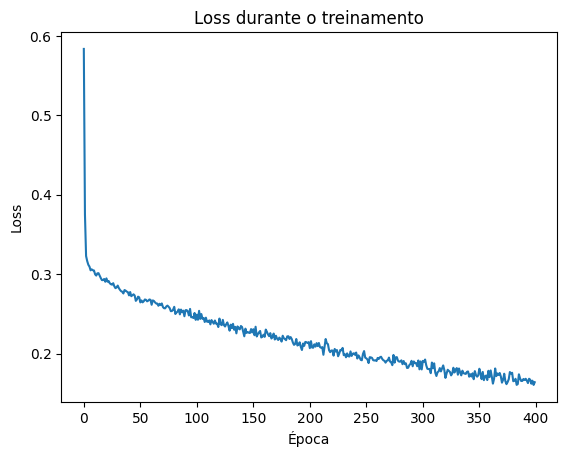

In [54]:
plt.plot(losses)
plt.title('Loss durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

## Verificando Loss do Teste

In [55]:
model.eval()

test_loss = 0.0
with torch.no_grad():
    for x_test, y_test in test_loader:
        outputs = model(x_test)
        loss = criterion(outputs, y_test)
        test_loss += loss.item() * x_test.size(0)

test_loss /= len(test_loader.dataset)

print(f"Loss no conjunto de teste: {test_loss:.6f}")

Loss no conjunto de teste: 0.284499


## Avaliação do Modelo

In [56]:
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(y_batch.tolist())
        y_pred.extend(predicted.tolist())

accuracy = (np.array(y_true) == np.array(y_pred)).mean()

print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.8837


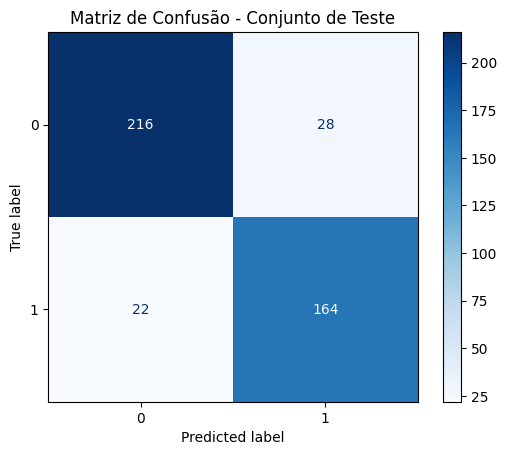

In [57]:
y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)

cm = confusion_matrix(y_true_np, y_pred_np)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Matriz de Confusão - Conjunto de Teste")
plt.show()

# Considerações Finais

### Durante o desenvolvimento deste projeto, inicialmente foi necessário utilizar o LabelEncoder para transformar a coluna de classes em valores numéricos, possibilitando que o modelo trabalhasse corretamente com um problema de classificação multiclasse. Um dos maiores desafios foi encontrar um equilíbrio entre capacidade de aprendizado e controle de overfitting, especialmente porque o dataset possui pouco mais de 2.100 linhas. Explorei diferentes arquiteturas e quantidades de neurônios até chegar a um modelo mais compacto, com duas camadas ocultas (64 e 32 neurônios) e dropout de 10%, que ajudou a evitar que a rede memorizasse o conjunto de treino e mantivesse a generalização. Ajustei também o número de épocas e acompanhei as curvas de perda para garantir que o modelo estivesse realmente aprendendo e não apenas decorando. Ao final, o modelo atingiu uma loss de treino de aproximadamente 0.1766, loss no conjunto de teste de 0.2865, e uma acurácia final de 87,9%, indicando que a rede conseguiu capturar bem os padrões relevantes do problema. Além disso, a análise da matriz de confusão contribuiu para identificar em quais classes o modelo teve maior dificuldade.
